In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv(r'C:\Projects_ciência_dados\regression_car_price\data\raw\used_cars.csv')

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         4009 non-null   object
 1   model         4009 non-null   object
 2   model_year    4009 non-null   int64 
 3   milage        4009 non-null   object
 4   fuel_type     3839 non-null   object
 5   engine        4009 non-null   object
 6   transmission  4009 non-null   object
 7   ext_col       4009 non-null   object
 8   int_col       4009 non-null   object
 9   accident      3896 non-null   object
 10  clean_title   3413 non-null   object
 11  price         4009 non-null   object
dtypes: int64(1), object(11)
memory usage: 376.0+ KB


In [4]:
dataset

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"
...,...,...,...,...,...,...,...,...,...,...,...,...
4004,Bentley,Continental GT Speed,2023,714 mi.,Gasoline,6.0L W12 48V PDI DOHC Twin Turbo,8-Speed Automatic with Auto-Shift,C / C,Hotspur,None reported,Yes,"$349,950"
4005,Audi,S4 3.0T Premium Plus,2022,"10,900 mi.",Gasoline,349.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,"$53,900"
4006,Porsche,Taycan,2022,"2,116 mi.",NaN,Electric,Automatic,Black,Black,None reported,NaN,"$90,998"
4007,Ford,F-150 Raptor,2020,"33,000 mi.",Gasoline,450.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,A/T,Blue,Black,None reported,Yes,"$62,999"


In [5]:
dataset['model'].str.contains('Premium').sum()

np.int64(251)

Valores faltantes

In [6]:
dataset.isnull().sum()

brand             0
model             0
model_year        0
milage            0
fuel_type       170
engine            0
transmission      0
ext_col           0
int_col           0
accident        113
clean_title     596
price             0
dtype: int64

In [7]:
dataset.describe()

,model_year
count,4009.000000
mean,2015.515590
std,6.104816
min,1974.000000
25%,2012.000000
50%,2017.000000
75%,2020.000000
max,2024.000000


Distância interquartílica

In [8]:
(dataset['model_year'].quantile(0.75))-(dataset['model_year'].quantile(0.25))

np.float64(8.0)

Média aparada

In [9]:
from scipy.stats import trim_mean

In [10]:
trim_mean(dataset['model_year'], 0.1)

np.float64(2016.256466188844)

boxplot

<Axes: ylabel='model_year'>

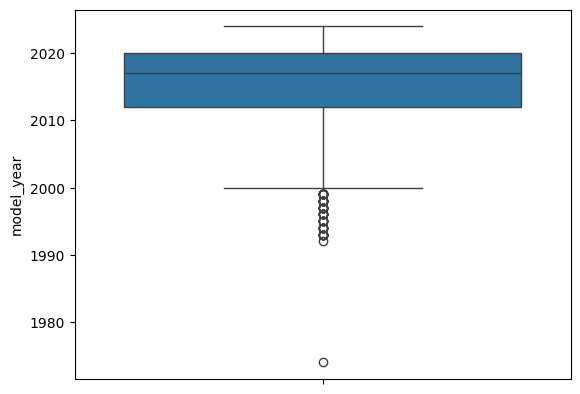

In [11]:
sns.boxplot(data=dataset, y=dataset['model_year'])

histograma

<Axes: xlabel='model_year', ylabel='Count'>

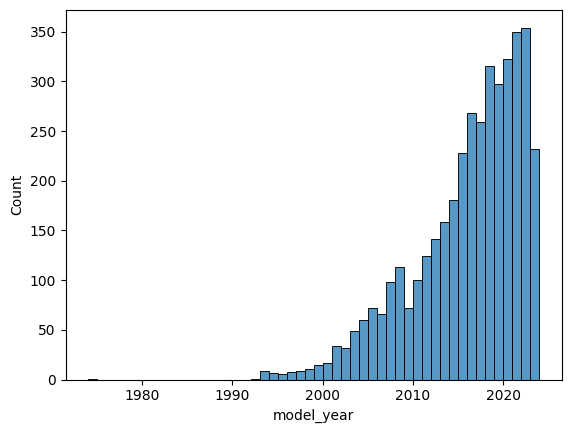

In [12]:
sns.histplot(data=dataset, x=dataset['model_year'])

Price está como Object e possui '$'

In [13]:
dataset['price'].dtype

dtype('O')

In [14]:
dataset['price']

0        $10,300
1        $38,005
2        $54,598
3        $15,500
4        $34,999
          ...   
4004    $349,950
4005     $53,900
4006     $90,998
4007     $62,999
4008     $40,000
Name: price, Length: 4009, dtype: object

Retirando '$' ',' e transformando em float

In [15]:
dataset['price'] = dataset['price'].str.replace(r'[\$,]', '', regex=True).astype(float)

In [16]:
model_year_price = dataset.select_dtypes(include=['int', 'float'])

In [17]:
model_year_price

,model_year,price
0,2013,10300.0
1,2021,38005.0
2,2022,54598.0
3,2015,15500.0
4,2021,34999.0
...,...,...
4004,2023,349950.0
4005,2022,53900.0
4006,2022,90998.0
4007,2020,62999.0


Ano de fabricação do carro possui uma correlação fraca com preço

<Axes: >

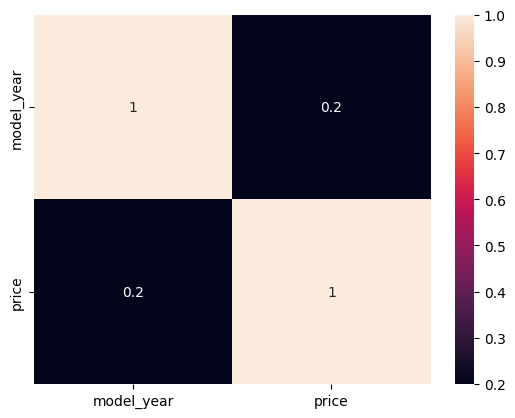

In [18]:
sns.heatmap(model_year_price.corr(), annot=True)

In [19]:
dataset.describe()

,model_year,price
count,4009.000000,4.009000e+03
mean,2015.515590,4.455319e+04
std,6.104816,7.871064e+04
min,1974.000000,2.000000e+03
25%,2012.000000,1.720000e+04
50%,2017.000000,3.100000e+04
75%,2020.000000,4.999000e+04
max,2024.000000,2.954083e+06


In [20]:
trim_mean(dataset['price'], 0.1)

np.float64(34151.68744157058)

In [21]:
dataset['price'].std()

np.float64(78710.635554182)

<Axes: ylabel='price'>

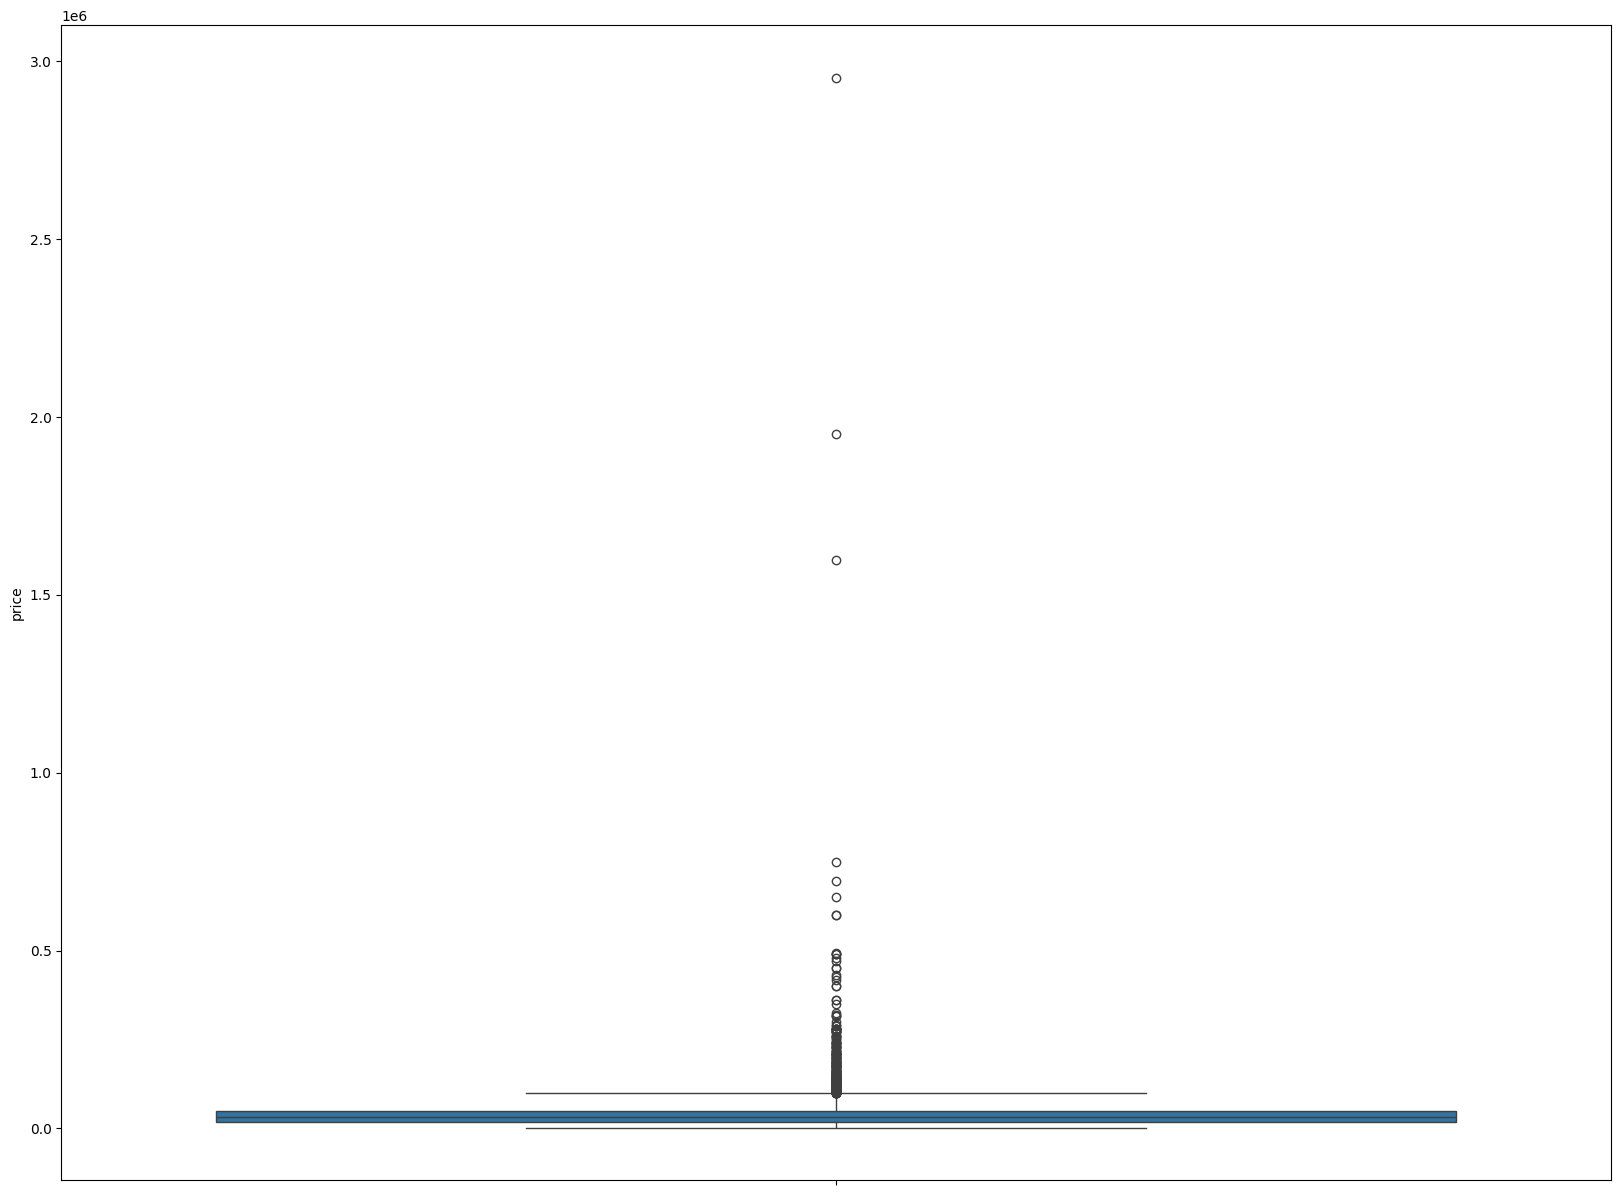

In [22]:
plt.figure(figsize=(20,15))
sns.boxplot(data=dataset, y='price')

Distância interquartílica

In [23]:
(dataset['price'].quantile(0.75)) - (dataset['price'].quantile(0.25))

np.float64(32790.0)

In [24]:
dataset.columns

Index(['brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine',
       'transmission', 'ext_col', 'int_col', 'accident', 'clean_title',
       'price'],
      dtype='object')

In [25]:
dataset['price'].quantile(0.90) # 90% dos preços são menores que 79999.0

np.float64(79999.0)

In [26]:
dataset['price'].quantile(0.75) # 75% dos preços são menores que 49990.0

np.float64(49990.0)

In [27]:
dataset.loc[dataset['price']>=80000, 'price'].count()

np.int64(399)

In [28]:
(235/4009)*100 # Porcentagem de carros que custam maior ou igual a 100.000

5.86181092541781

In [29]:
(399/4009)*100 # Porcentagem de carros que custam maior ou igual a 80.000

9.95260663507109

In [30]:
(517/4009)*100 # Porcentagem de carros que custam maior ou igual a 70.000

12.89598403591918

In [31]:
(984/4009)*100 # Porcentagem de carros que custam maior ou igual a 50.000

24.54477425791968

In [32]:
dataset['price'].median()

np.float64(31000.0)

In [33]:
dataset.shape

(4009, 12)

In [34]:
dataset = dataset[dataset['price']<75000]

In [35]:
dataset.loc[dataset['price']>75000, 'price'].count()

np.int64(0)

Bugatti Apresenta o maior preço

Text(0.5, 1.0, 'Preço médio por marca')

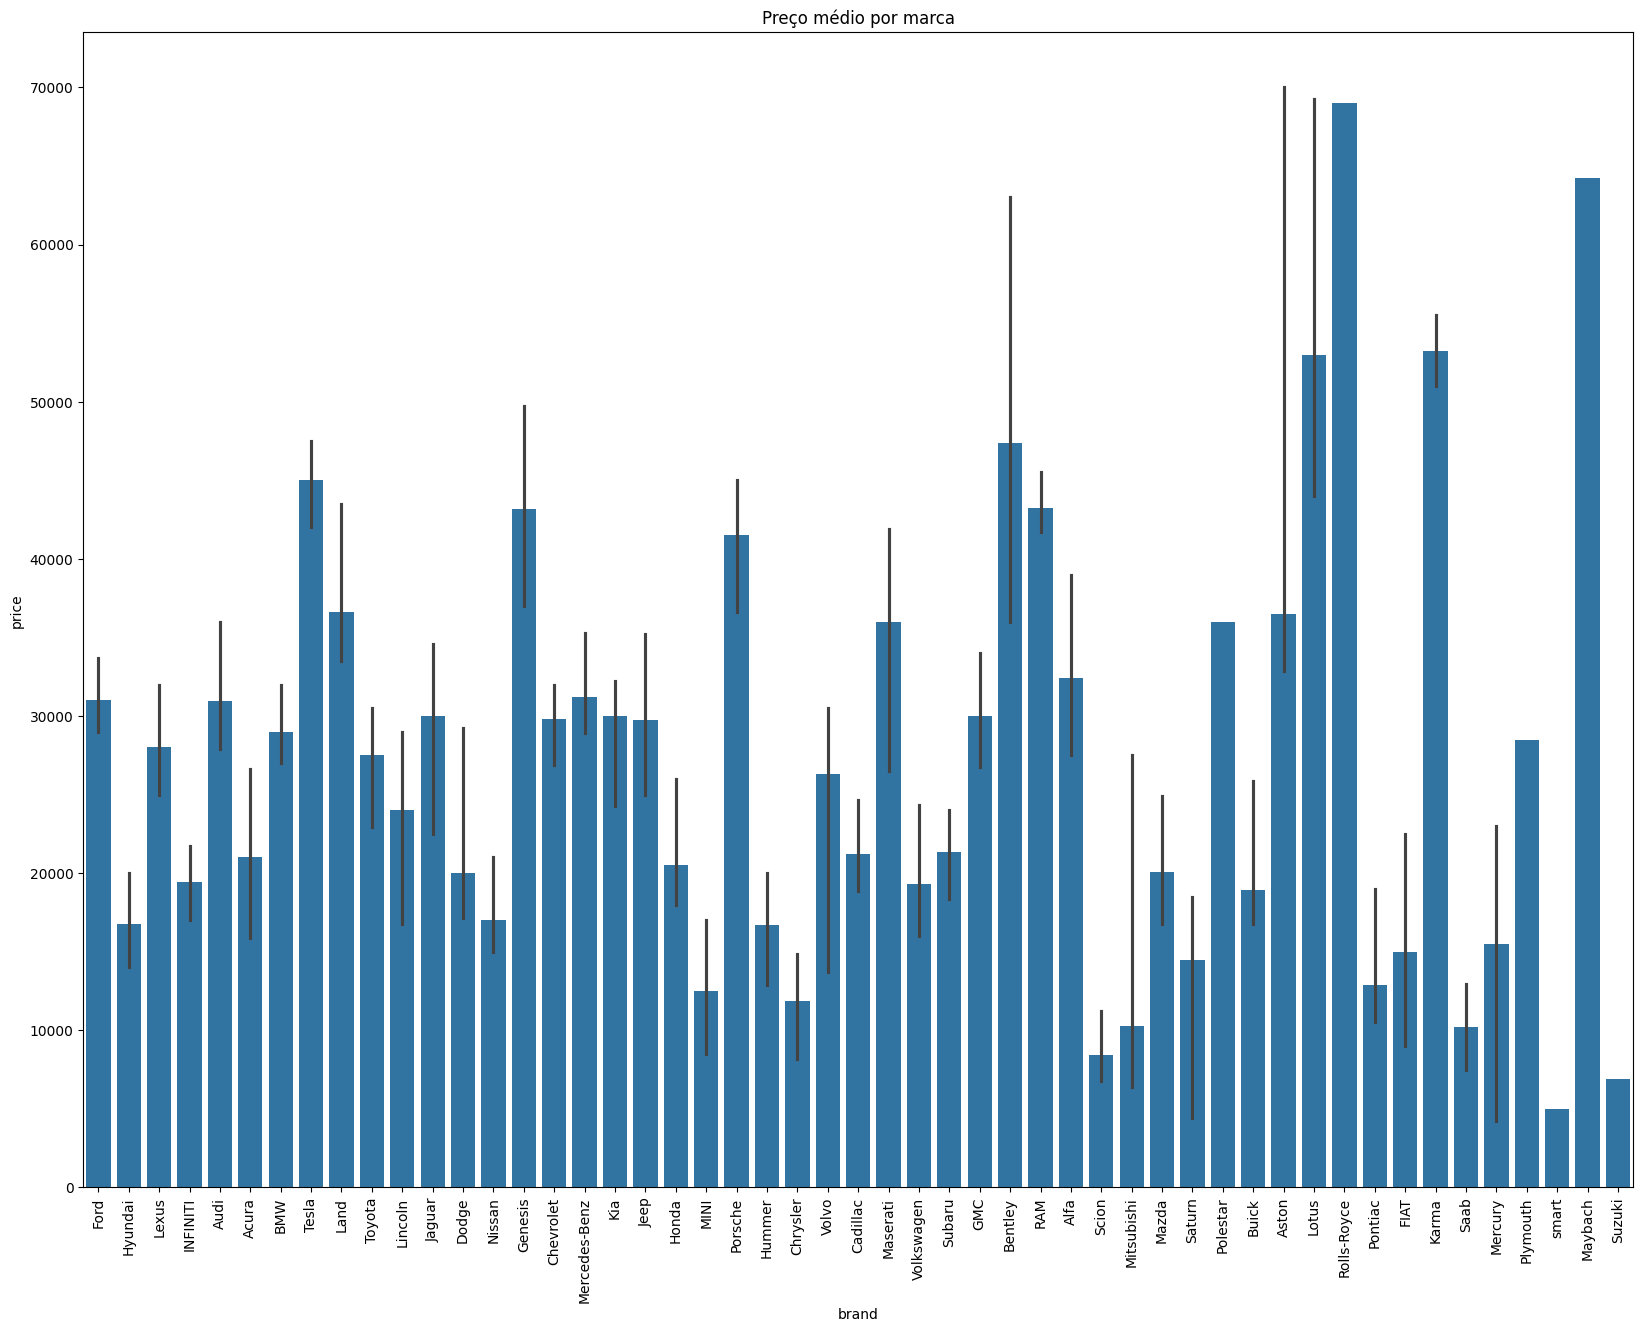

In [36]:
plt.figure(figsize=(20,15))
plt.xticks(rotation=90)
sns.barplot(data=dataset, x=dataset['brand'], y=dataset['price'], estimator=np.median)
plt.title('Preço médio por marca')

In [37]:
dataset.columns

Index(['brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine',
       'transmission', 'ext_col', 'int_col', 'accident', 'clean_title',
       'price'],
      dtype='object')

Modelo que possui maior preço

In [38]:
def modelo_maior_preco(dataset):
    maior_preco = dataset['price'].max()
    data = dataset.loc[dataset['price'] == maior_preco]
    
    return data['model']
    

In [39]:
modelo_maior_preco(dataset)

2797    X6 M50i
Name: model, dtype: object

In [40]:
dataset

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,10300.0
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,38005.0
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,54598.0
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,15500.0
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,34999.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4001,Volkswagen,Routan SE,2011,"194,000 mi.",Gasoline,283.0HP 3.6L V6 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Gray,At least 1 accident or damage reported,Yes,3500.0
4003,Mercedes-Benz,E-Class E 300 4MATIC,2018,"53,705 mi.",Gasoline,241.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,A/T,Black,Black,At least 1 accident or damage reported,Yes,25900.0
4005,Audi,S4 3.0T Premium Plus,2022,"10,900 mi.",Gasoline,349.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,53900.0
4007,Ford,F-150 Raptor,2020,"33,000 mi.",Gasoline,450.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,A/T,Blue,Black,None reported,Yes,62999.0


Retirada do 'mi' e da ',' da coluna milage 

In [41]:
dataset['milage'] = (
    dataset['milage']
    .str.replace(',', '', regex=False)
    .str.replace('mi.', '', regex=False)
    .str.replace('mi', '', regex=False)
    .astype(float))

C:\Users\pgssd\AppData\Local\Temp\ipykernel_12912\2649942859.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['milage'] = (


In [42]:
dataset['milage']

0        51000.0
1        34742.0
2        22372.0
3        88900.0
4         9835.0
          ...   
4001    194000.0
4003     53705.0
4005     10900.0
4007     33000.0
4008     43000.0
Name: milage, Length: 3549, dtype: float64

In [43]:
milage_price = pd.DataFrame({
    'milage':dataset['milage'],
    'price':dataset['price']
})

Milhas rodadas possui fraca correlação com preço

<Axes: >

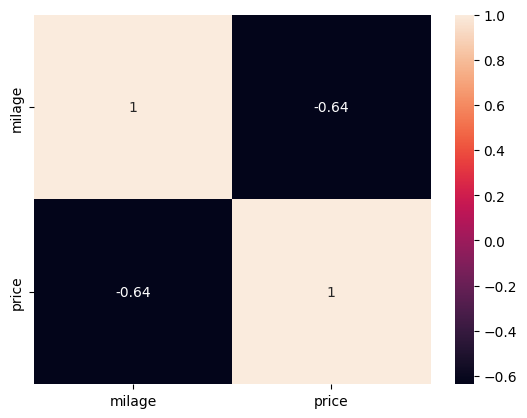

In [44]:
sns.heatmap(milage_price.corr(), annot=True)

<Axes: xlabel='price', ylabel='milage'>

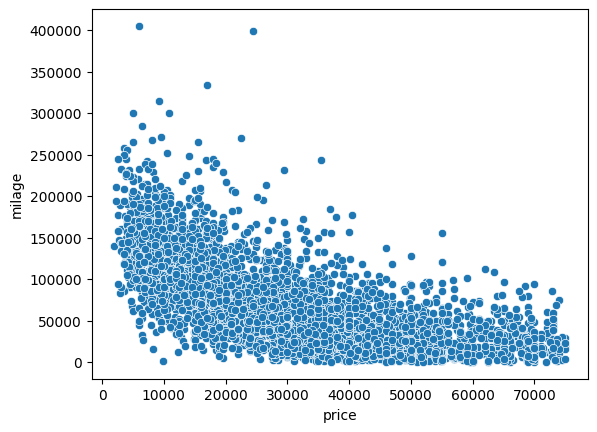

In [45]:
sns.scatterplot(data=dataset, x=dataset['price'], y=dataset['milage'])

In [46]:
dataset['fuel_type']

0       E85 Flex Fuel
1            Gasoline
2            Gasoline
3              Hybrid
4            Gasoline
            ...      
4001         Gasoline
4003         Gasoline
4005         Gasoline
4007         Gasoline
4008         Gasoline
Name: fuel_type, Length: 3549, dtype: object

<Axes: xlabel='fuel_type', ylabel='count'>

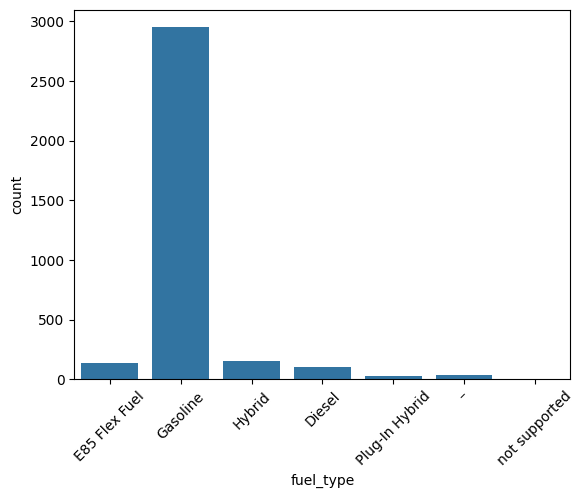

In [47]:
plt.xticks(rotation=45)
sns.countplot(data=dataset, x=dataset['fuel_type'])

Carros híbridos, diesel e Plug-In hybrid possuem quase o msm preço em média e são os mais caros

<Axes: xlabel='fuel_type', ylabel='price'>

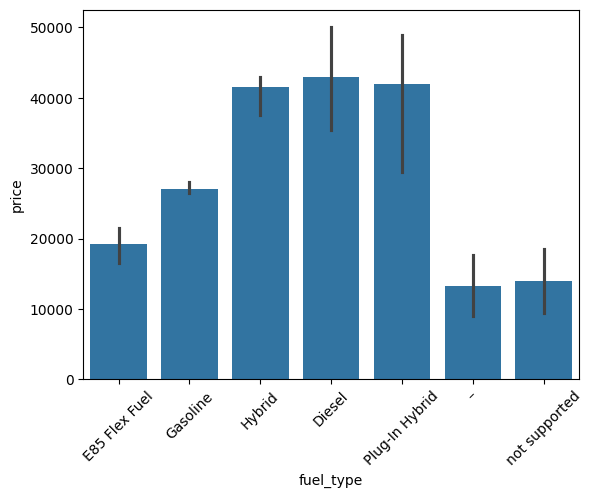

In [48]:
plt.xticks(rotation=45)
sns.barplot(data=dataset, x=dataset['fuel_type'], y=dataset['price'], estimator='median')

In [49]:
dataset.columns

Index(['brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine',
       'transmission', 'ext_col', 'int_col', 'accident', 'clean_title',
       'price'],
      dtype='object')

In [50]:
dataset['engine']

0       300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...
1                                    3.8L V6 24V GDI DOHC
2                                          3.5 Liter DOHC
3       354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...
4                              2.0L I4 16V GDI DOHC Turbo
                              ...                        
4001        283.0HP 3.6L V6 Cylinder Engine Gasoline Fuel
4003         241.0HP 2.0L 4 Cylinder Engine Gasoline Fuel
4005        349.0HP 3.0L V6 Cylinder Engine Gasoline Fuel
4007        450.0HP 3.5L V6 Cylinder Engine Gasoline Fuel
4008         248.0HP 2.0L 4 Cylinder Engine Gasoline Fuel
Name: engine, Length: 3549, dtype: object

Apresenta 1146 valores distintos, isso pode atrapalhar o treinamento

In [51]:
np.unique(dataset['engine'], return_counts=True)

(array(['1.2L I3 12V GDI DOHC Turbo', '1.3L I3 12V GDI DOHC Turbo',
        '1.3L I3 12V MPFI DOHC Turbo', ..., 'V6', 'V8', '–'],
       shape=(1010,), dtype=object),
 array([ 2,  3,  1, ...,  2,  1, 40], shape=(1010,)))

Criando a coluna cilindradas

In [52]:
dataset['engine_size'] = (
    dataset['engine']
    .str.extract(r'(\d\.\d)L')
    .astype(float)
)

C:\Users\pgssd\AppData\Local\Temp\ipykernel_12912\827741690.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['engine_size'] = (


In [53]:
dataset['engine_size']

0       3.7
1       3.8
2       NaN
3       3.5
4       2.0
       ... 
4001    3.6
4003    2.0
4005    3.0
4007    3.5
4008    2.0
Name: engine_size, Length: 3549, dtype: float64

Criando a coluna cilindros

In [54]:
dataset['engine_cylinders'] = (
    dataset['engine']
    .str.extract(r'([0-9]{1,2})')
    .astype(float)
)

C:\Users\pgssd\AppData\Local\Temp\ipykernel_12912\3963512106.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['engine_cylinders'] = (


In [55]:
dataset['engine_cylinders']

0       30.0
1        3.0
2        3.0
3       35.0
4        2.0
        ... 
4001    28.0
4003    24.0
4005    34.0
4007    45.0
4008    24.0
Name: engine_cylinders, Length: 3549, dtype: float64

Criando a coluna turbo

In [56]:
dataset['engine_turbo'] = dataset['engine'].str.contains('Turbo', case=False)

C:\Users\pgssd\AppData\Local\Temp\ipykernel_12912\4258159216.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['engine_turbo'] = dataset['engine'].str.contains('Turbo', case=False)


In [57]:
dataset['engine_turbo']

0       False
1       False
2       False
3       False
4        True
        ...  
4001    False
4003    False
4005    False
4007    False
4008    False
Name: engine_turbo, Length: 3549, dtype: bool

In [58]:
dataset.to_csv('../data/interim/dataset_interim.csv')